Author: [Chun-Kit Yeung](https://ckyeungac.com)

# Introduction
This tutorial proceeds from the previous tutorial in Numpy. In this tutorials, we are going to show you the general machine learning workflow using scikit-learn with an example of the iris classification problem.

Before dive into the details of scikit-learn, let me talk about what is the goal of iris classification problem. The goal of the iris classification problem is to find a machine learning model $h(\cdot)$ to predict whether a given sample $\mathbf{x}$ is an iris or not, i.e. $y \in \{0, 1, 2\}$, where the value indicates the type of iris (which will be explained later on).

Specifically, we are going to select a supervised machine learning model $h(\cdot)$ which maps an input sample $\mathbf{x} = (x_1, x_2, \dots, x_n)$ to an output $y$. That is $y = h(\mathbf{x})$ (you can view it as a math function.) Different machine learning algorithms have different approaches in finding such the model $h(\cdot)$. 

So, before starting any of the machine leanring project, it is very important to identify the features $\mathbf{x}$ that are being used, and the output label $y$ that we are going to predict.


First and foremost, let's import the packages required in this library.

In [1]:
import numpy as np
import sklearn 
import matplotlib
import matplotlib.pyplot as plt

# tell the jupyter notebook that plot the diagram directly in the output
%matplotlib inline 
    
print ('numpy version:', np.__version__)
print ('scikit-learn version:', sklearn.__version__)
print ('matplotlib version:', matplotlib.__version__)

SEP = '='*30

numpy version: 1.11.3
scikit-learn version: 0.18.1
matplotlib version: 1.5.1


# Dataset
Scikit-learn includes a few well-known datasets. The Iris flower dataset includes information about 150 instances from three different Iris flower species, including sepal and petal length and width. The natural task to solve using this dataset is to learn to guess the Iris species knowing the sepal and petal measures.

In [2]:
from sklearn import datasets
iris = datasets.load_iris() # loading the iris dataset

In [3]:
dir(iris)

['DESCR', 'data', 'feature_names', 'target', 'target_names']

As you can see, `iris` contains 5 "types" of data that we can access. Let me briefly explain them:
+ 'DESCR': it is the description of the dataset
+ 'data': it is the features of the dataset
+ 'feature_names': it is the name of the features
+ 'target': it is the output labels
+ 'target_names': it is the name of the output labels

In [4]:
X_iris = iris.data
y_iris = iris.target

In [5]:
type(X_iris) # the data is stored in an numpy array

numpy.ndarray

In [6]:
print('The shape of input features: {0}'.format(X_iris.shape))
print('The shape of output labels: {0}'.format(y_iris.shape))
print(SEP)
print('Feature names: {0}'.format(iris.feature_names))
print('First instance features: {0}'.format(X_iris[0]))
print(SEP)
print('Target classes: {0}'.format(iris.target_names))
print('Target classes values: {}'.format(set(iris.target)))

The shape of input features: (150, 4)
The shape of output labels: (150,)
Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
First instance features: [ 5.1  3.5  1.4  0.2]
Target classes: ['setosa' 'versicolor' 'virginica']
Target classes values: {0, 1, 2}


The above code give you a brief understanding about the dataset.

`The shape of input features: (150, 4)` means that there are 150 samples and each with 4 features.

The namse of the four features are shown in `Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']`.

The output labels $y \in \{0, 1, 2\}$ each representing the type of iris - `['setosa' 'versicolor' 'virginica']`

To better understand the data, we also visualize the features with diagram.

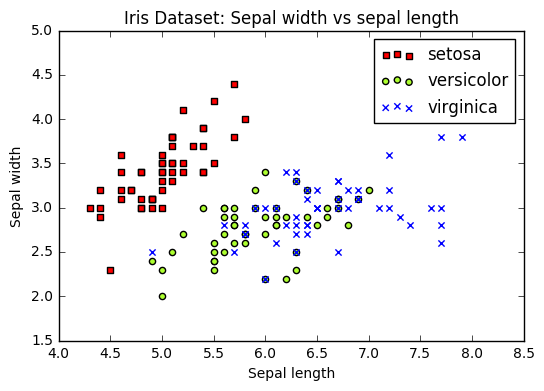

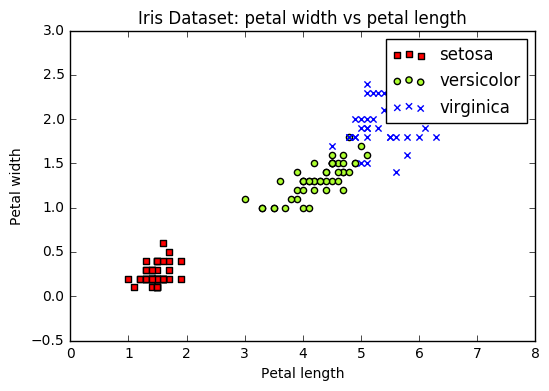

In [7]:
plt.figure('sepal')
colormarkers = [ ['red','s'], ['greenyellow','o'], ['blue','x']]
for i in range(len(colormarkers)):
    px = X_iris[:, 0][y_iris == i]
    py = X_iris[:, 1][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: Sepal width vs sepal length')
plt.legend(iris.target_names)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.figure('petal')

for i in range(len(colormarkers)):
    px = X_iris[:, 2][y_iris == i]
    py = X_iris[:, 3][y_iris == i]
    plt.scatter(px, py, c=colormarkers[i][0], marker=colormarkers[i][1])

plt.title('Iris Dataset: petal width vs petal length')
plt.legend(iris.target_names)
plt.xlabel('Petal length')
plt.ylabel('Petal width')
plt.show()

# Prepare the training data and testing data
Now, the data is ready and we have a basic understanding about it. The second stage in machine learning is constructing a predictive model consists of training and testing. We'll use our data to train the model, and then we'll test the model to see how closely it is able to predict the label.

Yet, we only have one dataset, how could we have one dataset for training and one dataset for testing? So, our first step will be to separate the dataset into to separate sets, using 80% of the instances for training our classifier, and the remaining 20% for testing it. Scikit-learn provides a handy library in doing so:

In [8]:
# import the library
from sklearn.model_selection import train_test_split

In [9]:
# split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

In [10]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120,), (30,))

# Use Naive Bayes Classifier
We use the multinomial naive Bayes classifier from scikit-learn.

```python
MultinomialNB(alpha=1.0, fit_prior=True, class_prior=None)
====
alpha: 
    type: float, optional (default=1.0)
    dscr: Additive (Laplace/Lidstone) smoothing parameter (0 for no smoothing).

fit_prior: 
    type: boolean, optional (default=True)
    dscr: Whether to learn class prior probabilities or not. If false, a uniform prior will be used.

class_prior: 
    type: array-like, size (n_classes,), optional (default=None)
    dscr: Prior probabilities of the classes. If specified the priors are not adjusted according to the data.
====
```


In [11]:
from sklearn.naive_bayes import MultinomialNB

In [12]:
# instantiate an MultinomialNB object
clf = MultinomialNB() # clf stands for classifier

## Training

In [13]:
# call the fit() method to train the classifier
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Testing

We are going to test our model, the evaluation measure we used here is **accuracy**. Yet it is a multi-class problem, how do we going to find the accuracy?

In [14]:
def accuracy(y_true, y_pred):
    """
    This function return the accuracy score.
    
    :type y_true: list, list of ground true labels
    :type y_pred: list, list of predicted labels
    :rtype: float, accuracy score of the model
    """
    num_samples = len(y_pred)
    correctness = [y_true[i]==y_pred[i] for i in range(num_samples)]
    num_correct = sum(correctness)
    acc = num_correct/num_samples
    return acc

In [15]:
y_pred = clf.predict(X_train)
accuracy(y_train, y_pred)

0.94999999999999996

# Take home exercise
1. How do you find the prior probability

In [16]:
def get_prior(y, target):
    """
    This function return the prior probability of the target.
    
    :type y: list, list of the ground true label
    :type target: Object, a value that is in the list y
    :rtype: float
    """
    assert target in y, "target is not in y!"
    # TODO
    pass

In [17]:
def get_likelihood(y, X, y_target):
    """
    This function return the prior probability of the target.
    
    :type y: list, list of the ground true label
    :type target: Object, a value that is in the list y
    :rtype: float
    """
    assert y_target in y, "y_target is not in y!"
    assert X_target in X, "X_target is not in X!"
    # TODO
    pass